In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# **Dataset** 

In [3]:
df = pd.read_csv('../input/credit-card/application_data.csv')
df1 = df.copy()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# **Remove columns has too much missing value**

In [5]:
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [6]:
null_counts = df.isnull().sum()

columns_with_less_than_500_null = null_counts[null_counts < 500].index

columns_with_more_than_500_null = null_counts[null_counts > 500].index

print("Columns with less than 500 null values:")
print(columns_with_less_than_500_null)

print("\nColumns with more than 500 null values:")
print(columns_with_more_than_500_null)

Columns with less than 500 null values:
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FL

In [7]:
df = df.drop(columns_with_more_than_500_null, axis=1)

In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
SK_ID_CURR                       0
FLAG_DOCUMENT_7                  0
LIVE_REGION_NOT_WORK_REGION      0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
FLAG_DOCUMENT_2                  0
FLAG_DOCUMENT_3                  0
FLAG_DOCUMENT_4                  0
FLAG_DOCUMENT_5                  0
FLAG_DOCUMENT_6                  0
FLAG_DOCUMENT_9                  0
FLAG_DOCUMENT_8                  0
REG_REGION_NOT_LIVE_REGION       0
FLAG_DOCUMENT_10                 0
FLAG_DOCUMENT_11                 0
FLAG_DOCUMENT_12                 0
FLAG_DOCUMENT_13                 0
FLAG_DOCUMENT_14                 0
FLAG_DOCUMENT_15                 0
FLAG_DOCUMENT_16                 0
FLAG_DOCUMENT_17                 0
FLAG_DOCUMENT_18                 0
FLAG_DOCUMENT_19    

## Adding missing values by mode/median/mean

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)
print(df)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [11]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

In [12]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15'

## Label encoding

In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for name in df[categorical].columns:
    
    df[name]= label_encoder.fit_transform(df[name])
    print(df[name])

0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: int64
0         1
1         0
2         1
3         0
4         1
         ..
307506    1
307507    0
307508    0
307509    0
307510    0
Name: CODE_GENDER, Length: 307511, dtype: int64
0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: FLAG_OWN_CAR, Length: 307511, dtype: int64
0         1
1         0
2         1
3         1
4         1
         ..
307506    0
307507    1
307508    1
307509    1
307510    0
Name: FLAG_OWN_REALTY, Length: 307511, dtype: int64
0         7
1         4
2         7
3         7
4         7
         ..
307506    7
307507    3
307508    7
307509    1
307510    1
Name: NAME_INCOME_TYPE, Length: 307511, dtype: int64
0         4
1         1
2         4
3         4
4         4
         ..
307506    4

## Integer data type

In [14]:
df.select_dtypes('int').describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.341669,0.340108,0.693673,0.417052,4.670288,3.188273,1.472312,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.544525,1.298753,1.168884,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,7.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


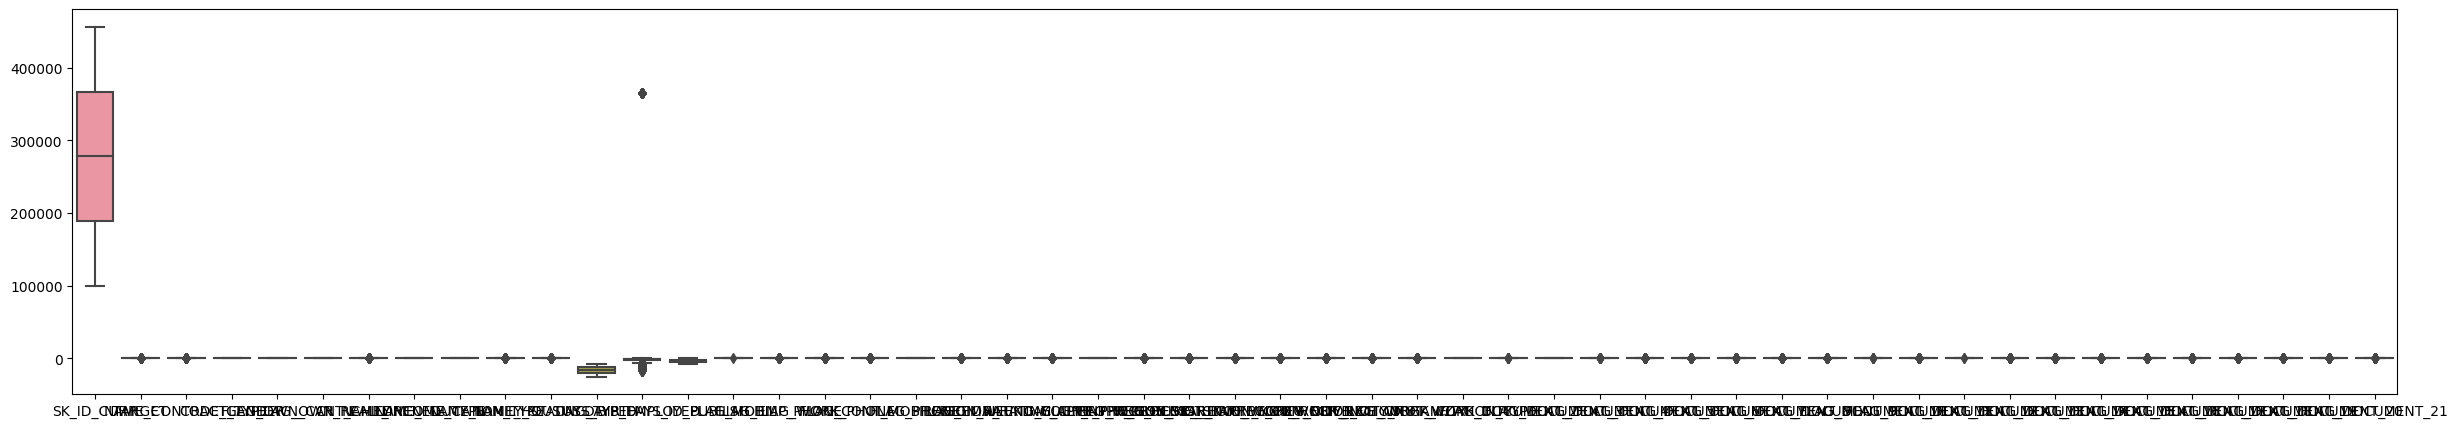

In [15]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df.select_dtypes('int'))
plt.show()

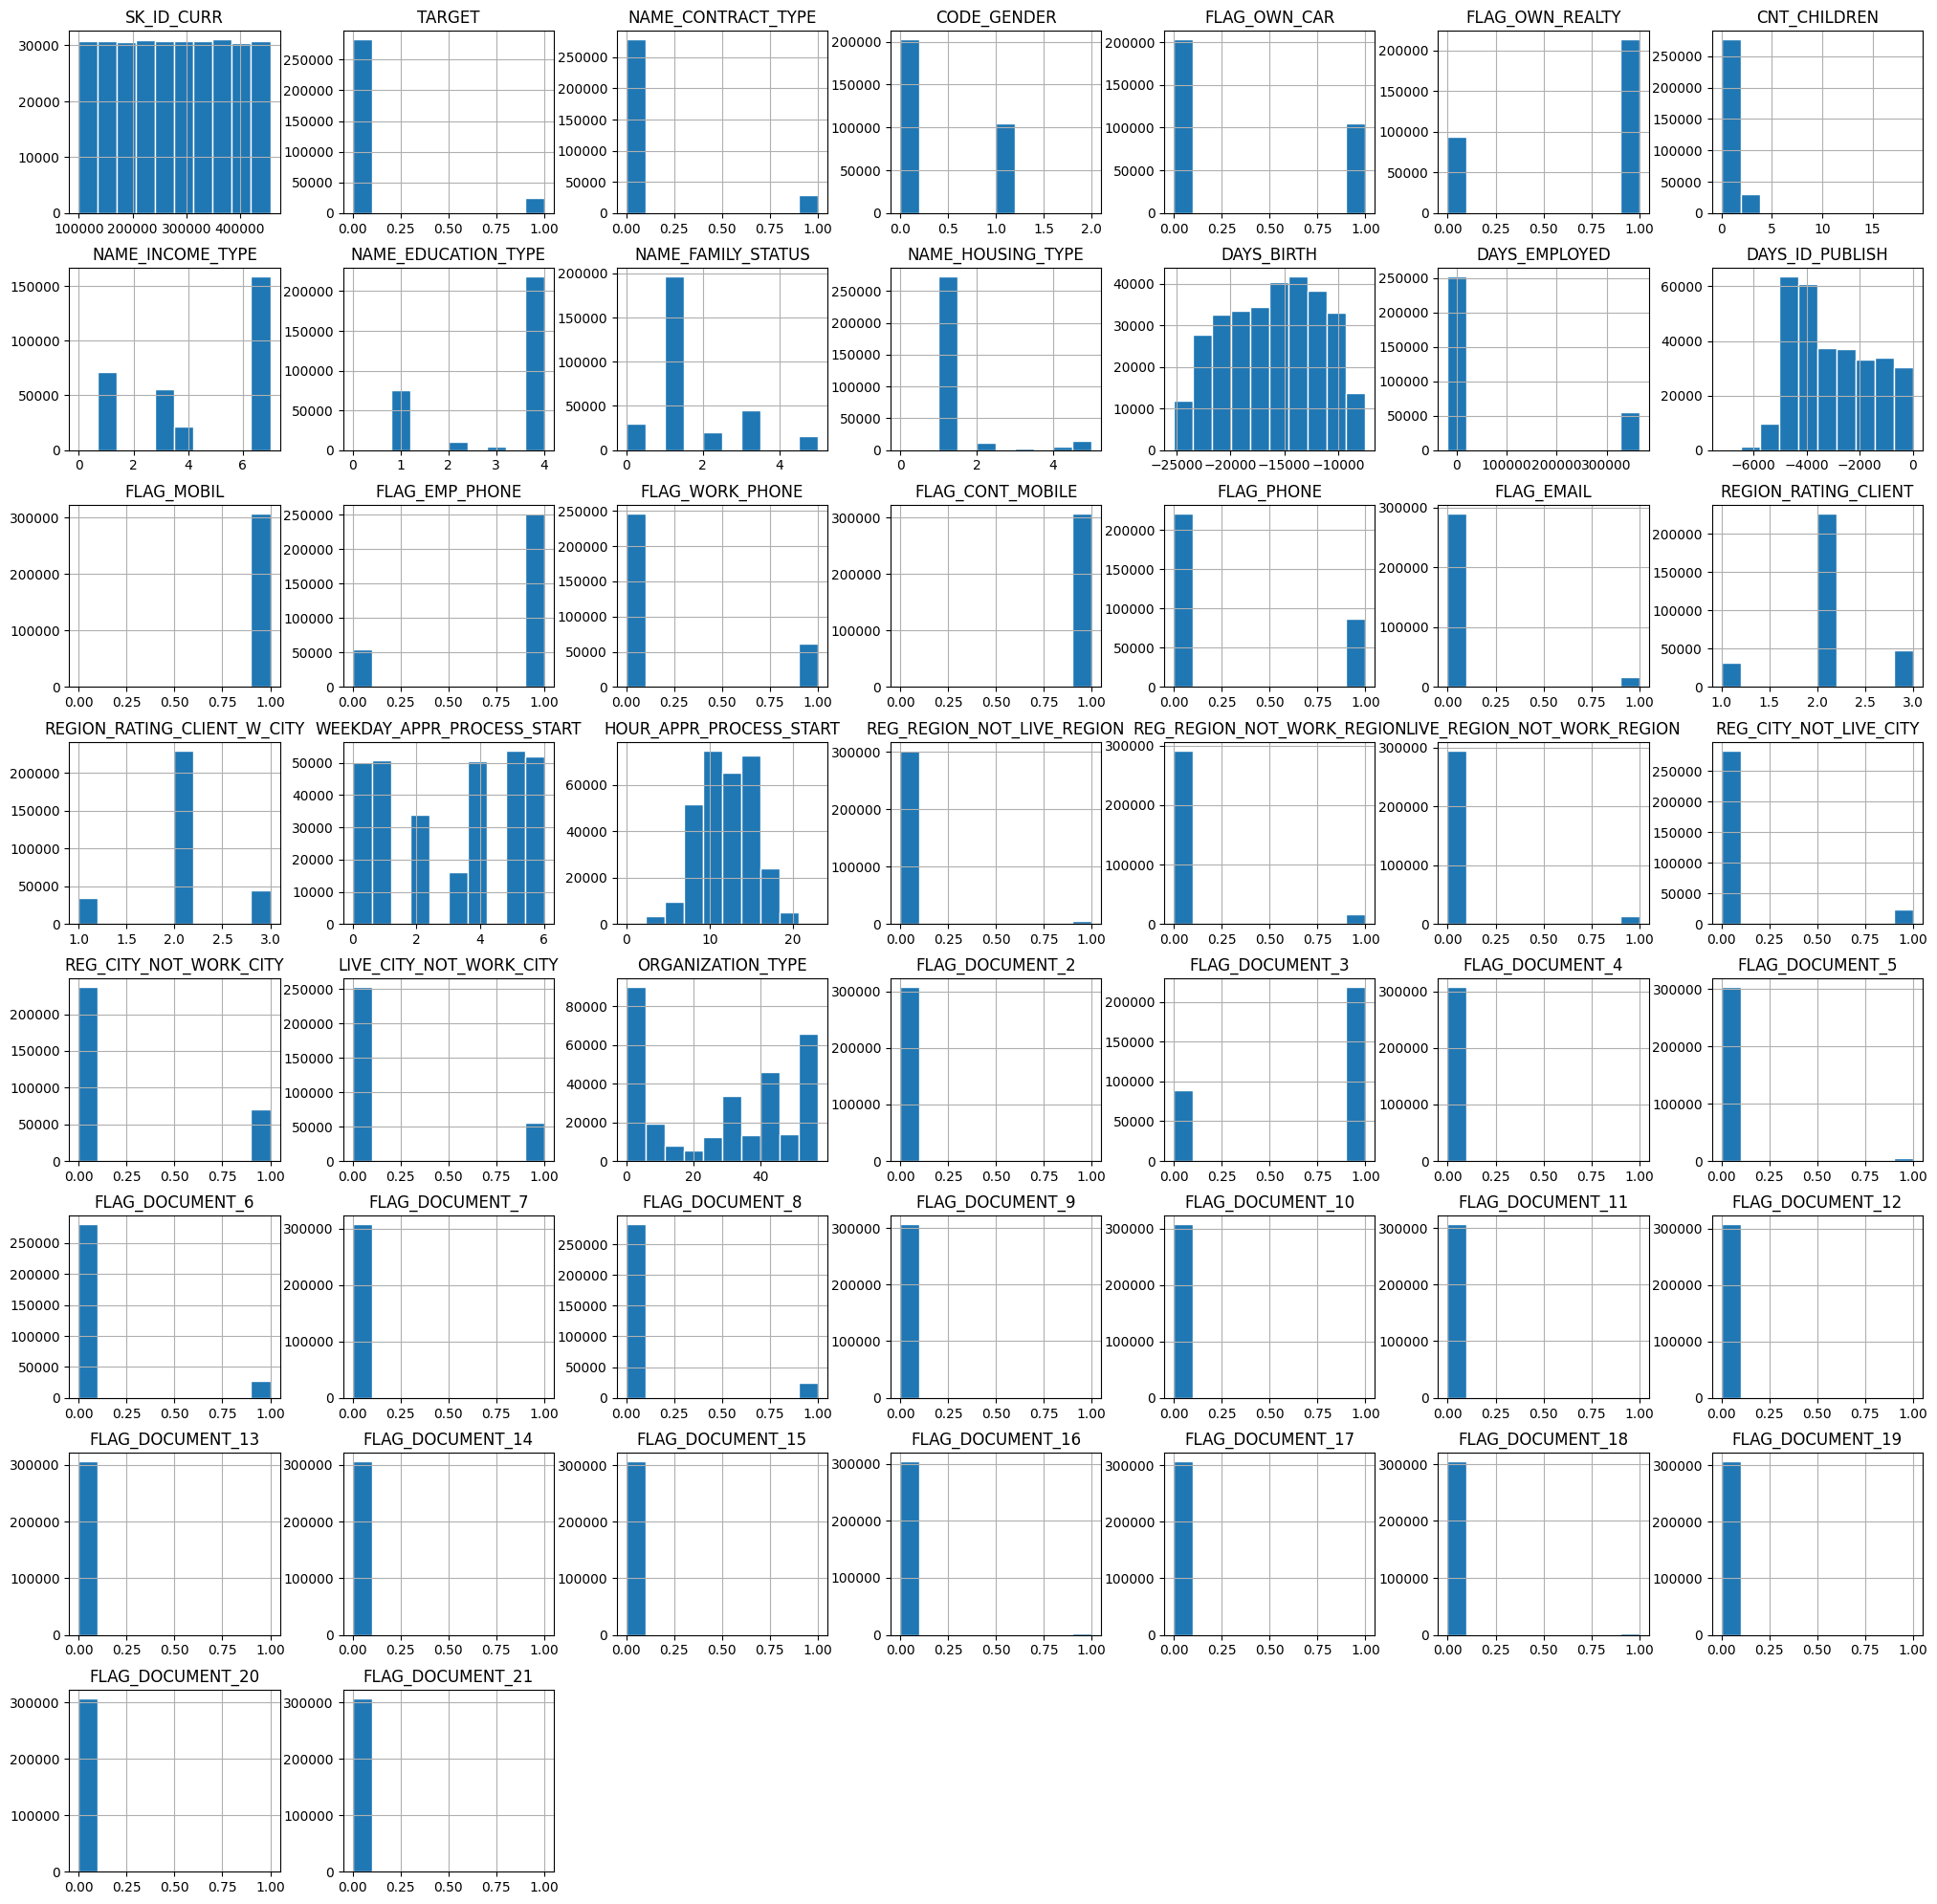

In [16]:
df.select_dtypes('int').hist(figsize=(25,25), ec='w')
plt.show()

In [17]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df.select_dtypes('int').corr().style.applymap(color_)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.002112,-0.000529,0.002846,0.002191,-0.001500,0.001366,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.001075,-0.001138,0.002185,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002269,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,0.046829,0.054699,-0.004127,0.034489,0.078239,-0.044932,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.058899,0.060893,0.004002,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.030765,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,0.005428,-0.065086,0.011272,0.024190,0.086364,-0.054450,0.052847,0.000585,0.054938,-0.033647,-0.097116,-0.021378,-0.010811,-0.021593,-0.023116,-0.006925,0.035897,0.018561,0.015774,0.007941,0.013586,0.004487,-0.004999,-0.040187,-0.002109,-0.479724,0.004448,0.029372,-0.098808,0.042703,-0.084961,-0.006592,0.014708,0.025995,-0.000827,-0.004900,0.000005,-0.007783,-0.023433,-0.000548,-0.007530,-0.005190,-0.007308,0.055821
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.065089,0.009554,-0.099713,0.058767,0.148080,-0.156018,0.000130,-0.002503,0.157253,0.034030,-0.006017,-0.019429,0.018218,-0.017862,-0.017263,-0.000271,0.007177,0.023683,0.103437,0.106060,0.048237,0.137541,0.133239,-0.163879,-0.001520,-0.087338,-0.002693,0.003255,-0.100766,-0.002059,0.249767,-0.008070,0.000874,0.004830,0.000851,0.040447,0.000947,0.020888,0.000061,0.003772,0.022205,0.004632,0.003258,0.023908
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.033186,-0.093977,-0.131014,-0.004041,0.129879,-0.154441,0.013661,-0.002512,0.154659,0.011471,-0.006644,-0.007588,0.032105,-0.022668,-0.021405,0.002346,0.014369,-0.000668,0.038937,0.046352,0.003123,0.076081,0.088061,-0.114162,-0.000445,-0.070000,-0.001144,-0.013661,-0.106012,0.000958,0.228368,-0.011069,0.000891,-0.000456,0.003552,0.080647,0.003410,0.045909,0.001984,-0.002476,-0.000097,0.002184,0.007299,0.006741
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.044340,-0.002817,1.000000,-0.002366,-0.026539,0.022130,0.000521,-0.199722,-0.119146,0.069677,0.006664,-0.001198,-0.070021,-0.114043,0.008526,-0.041507,0.029247,0.001289,0.001884,-0.003414,-0.102687,-0.036301,-0.032316,-0.018324,-0.061709,-0.061889,-0.035991,0.050389,0.003236,-0.036839,0.002080,-0.011922,0.041567,0.003093,-0.035077,-0.003513,0.003171,-0.035201,-0.001071,-0.057484,-0.054678,-0.035729,-0.092272,-0.014207,-0.087687,-0.019364,-0.025130,-0.000173
CNT_CHILDREN,-0.001129,0.019187,0.029998,0.047403,0.102023,-0.002366,1.000000,0.102547,-0.034128,-0.165475,0.021737,0.330938,-0.2

In [18]:
df.select_dtypes('int').cov().style.applymap(color_)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,10565820148.159863,-59.041266,49.904818,-37.511009,59.220499,33.309955,-83.819815,-552.375798,-70.654800,341.991150,214.177204,-672773.474806,19840118.340063,-59637.043657,0.519822,-52.792950,-17.026415,12.488786,127.210825,6.675923,-56.230029,-58.787004,482.738910,117.591486,-3.550655,24.765159,58.934592,-52.006771,-68.495018,2.649812,4773.354138,0.467797,-159.105827,-3.835537,-13.758077,61.789431,-3.835484,50.845908,9.635097,-0.399524,-12.911967,-0.274046,5.460625,-5.991139,9.303135,-7.376408,2.433360,4.698847,0.419252,2.482850,0.531302
TARGET,-59.041266,0.074212,-0.002470,0.007067,-0.002820,-0.000772,0.003774,0.032461,0.019353,-0.001314,0.008937,93.013383,-1729.246843,21.159315,0.000000,0.004814,0.003105,0.000004,-0.002915,-0.000111,0.008168,0.008340,0.002343,-0.021500,0.000186,0.000415,0.000152,0.003247,0.005850,0.003400,-0.171506,0.000010,0.005482,-0.000007,-0.000010,-0.002208,-0.000006,-0.000599,-0.000074,-0.000002,-0.000072,-0.000001,-0.000187,-0.000140,-0.000062,-0.000314,-0.000015,-0.000195,-0.000009,0.000001,0.000018
NAME_CONTRACT_TYPE,49.904818,-0.002470,0.086148,-0.001199,0.000559,0.009089,0.006358,0.004054,-0.024810,0.003867,0.006753,110.620534,-2257.809671,23.413132,0.000000,0.006196,-0.003946,-0.001230,-0.002821,-0.000734,-0.003226,-0.003411,-0.004369,0.034409,0.000665,0.001016,0.000460,0.001070,0.000555,-0.000563,-0.241371,-0.000004,-0.063890,0.000012,0.001052,-0.008218,0.000174,-0.006818,-0.000121,0.000021,0.000476,-0.000001,-0.000085,0.000000,-0.000079,-0.000682,-0.000003,-0.000198,-0.000037,-0.000048,0.000300
CODE_GENDER,-37.511009,0.007067,-0.001199,0.224958,0.077708,-0.009694,0.016236,0.078553,0.005885,-0.055281,0.026512,306.500272,-10454.244961,0.093027,-0.000002,0.028661,0.006448,-0.000123,-0.004142,0.001999,-0.004313,-0.004116,-0.000276,0.011118,0.001372,0.010770,0.009935,0.006142,0.027472,0.024255,-1.590583,-0.000005,-0.018796,-0.000012,0.000188,-0.013543,-0.000014,0.032389,-0.000238,0.000002,0.000143,0.000001,0.001137,0.000024,0.000344,0.000003,0.000029,0.000946,0.000054,0.000035,0.000207
FLAG_OWN_CAR,59.220499,-0.002820,0.000559,0.077708,0.224435,-0.000615,0.034902,0.040004,-0.057822,-0.072549,-0.001821,268.514585,-10336.529583,9.769226,-0.000002,0.028156,0.002171,-0.000136,-0.001616,0.003518,-0.005466,-0.005098,0.002389,0.022231,-0.000039,0.004049,0.004337,0.000397,0.015179,0.016012,-1.106751,-0.000001,-0.015047,-0.000005,-0.000790,-0.014232,0.000006,0.029580,-0.000327,0.000002,-0.000013,0.000004,0.002264,0.000087,0.000756,0.000093,-0.000019,-0.000004,0.000025,0.000078,0.000058
FLAG_OWN_REALTY,33.309955,-0.000772,0.009089,-0.009694,-0.000615,0.212492,-0.000787,-0.031129,0.013249,0.000281,-0.087570,-239.680275,4537.622439,4.636710,-0.000001,-0.012404,-0.021003,0.000170,-0.008601,0.003118,0.000302,0.000437,-0.003383,-0.154590,-0.002044,-0.003270,-0.001668,-0.007636,-0.012014,-0.006368,0.475318,0.000010,-0.007705,0.000009,-0.000671,0.005430,0.000020,-0.004421,-0.000101,0.000007,-0.001013,-0.000001,-0.001570,-0.001364,-0.000572,-0.004217,-0.000107,-0.003630,-0.000218,-0.000261,-0.000001
CNT_CHILDREN,-83.819815,0.003774,

## Float data type

In [19]:
df.select_dtypes('float').describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-4986.120328,2.152664,-962.858119
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,3522.886321,0.910679,826.807226
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-24672.000000,1.000000,-4292.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-7479.500000,2.000000,-1570.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-4504.000000,2.000000,-757.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-2010.000000,3.000000,-274.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,0.000000,20.000000,0.000000


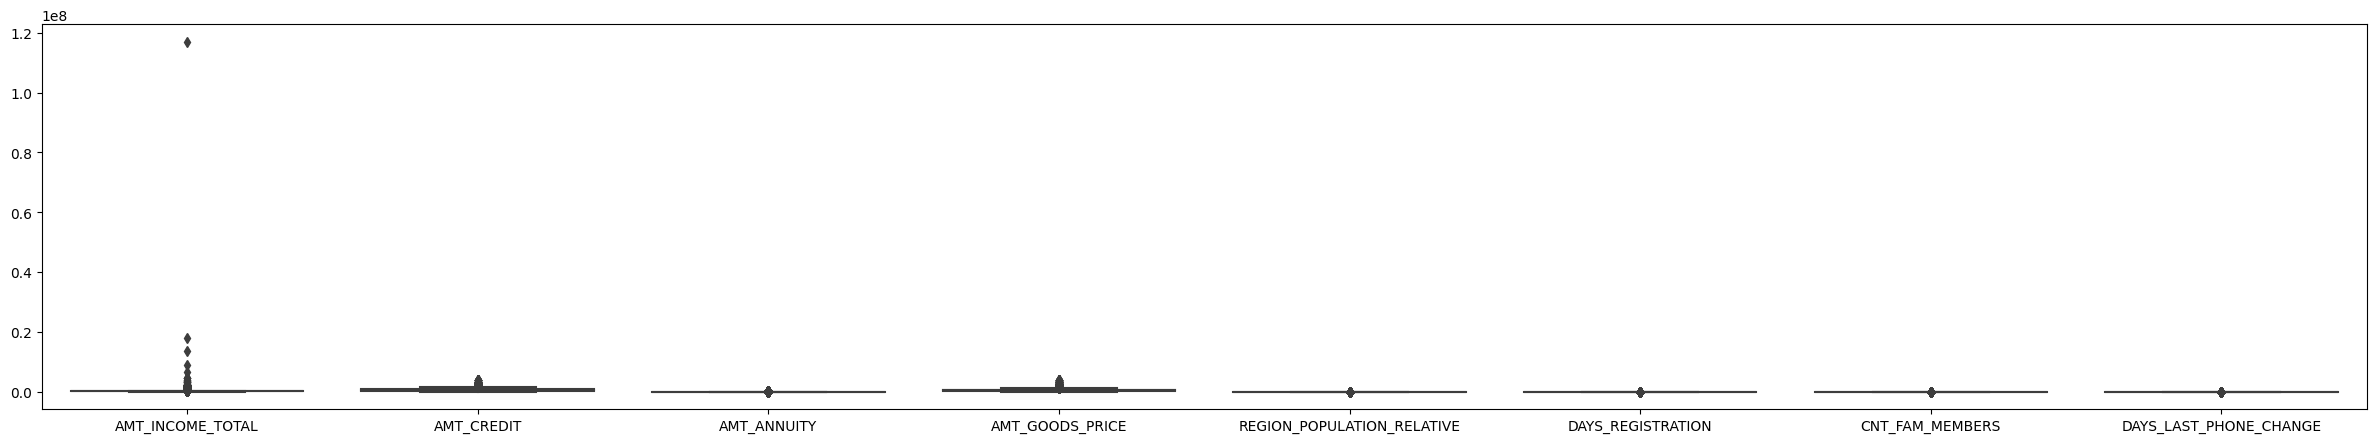

In [20]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df.select_dtypes('float'))
plt.show()

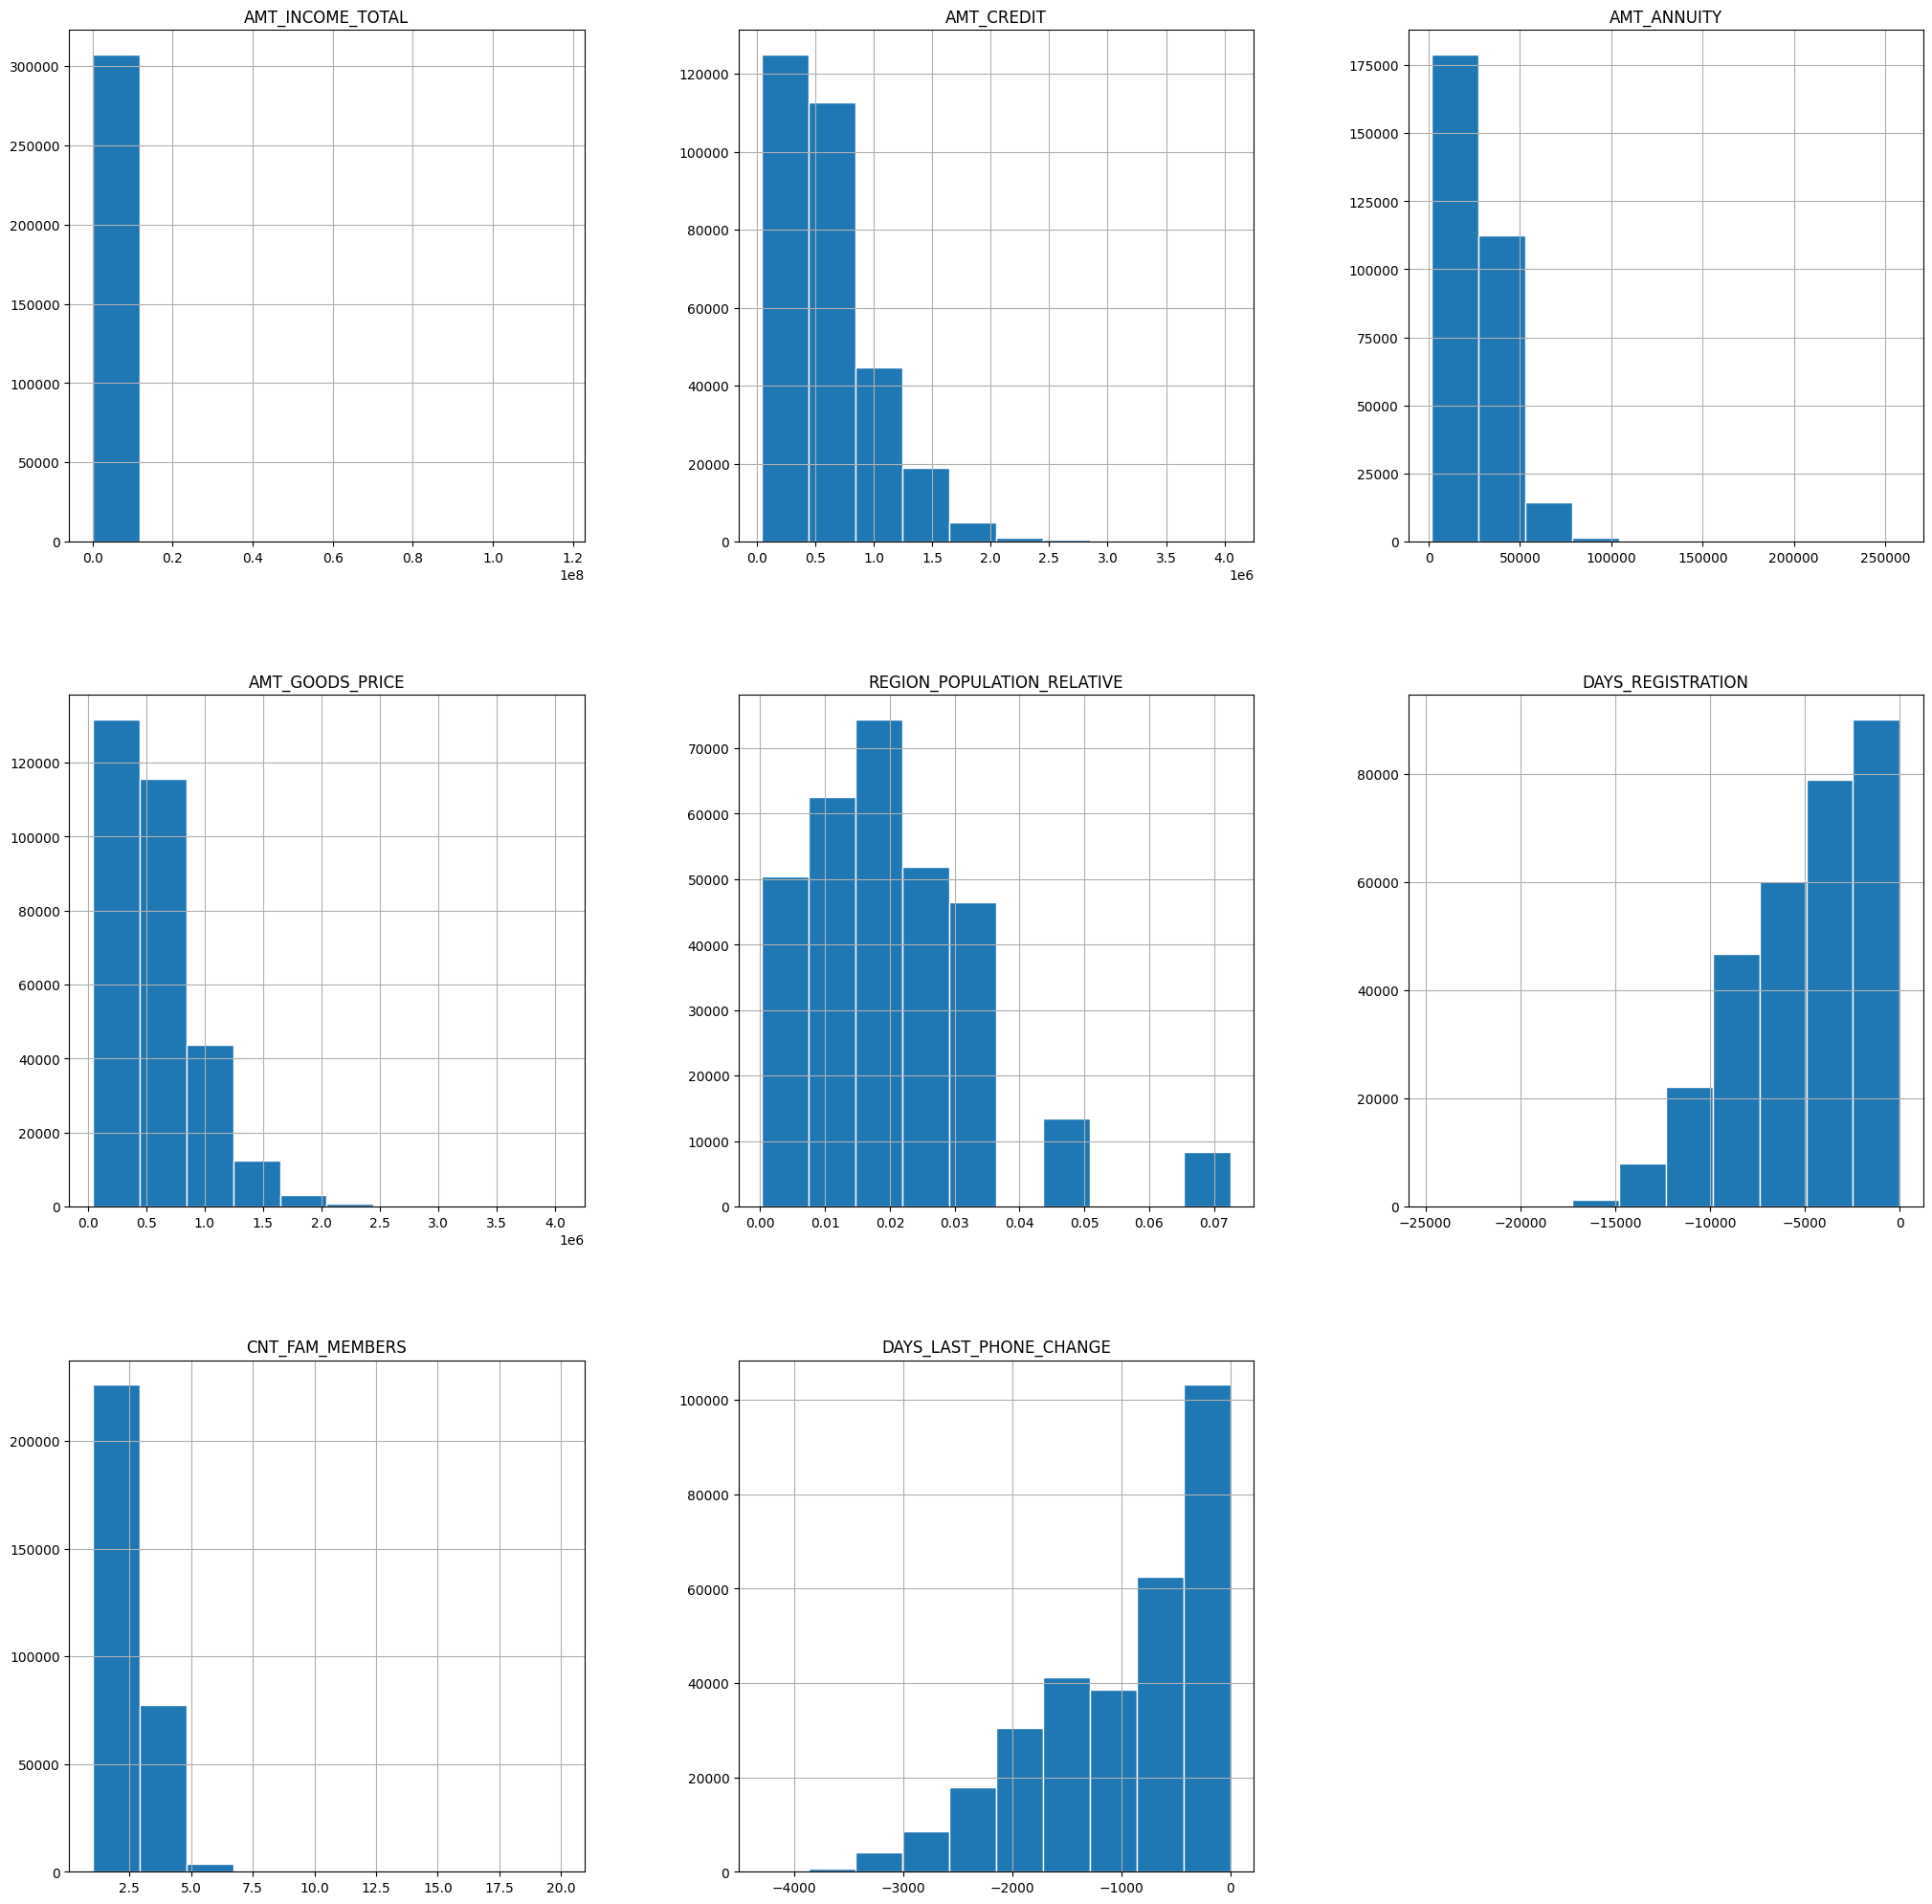

In [21]:
df.select_dtypes('float').hist(figsize=(25,25), ec='w')
plt.show()

In [22]:
df.select_dtypes('float').corr().style.applymap(color_)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632,0.074796,0.027805,0.016341,-0.018585
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734,0.099738,0.009621,0.063160,-0.073702
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837,0.118418,0.038514,0.075541,-0.063746
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000,0.103519,0.011546,0.061138,-0.076294
REGION_POPULATION_RELATIVE,0.074796,0.099738,0.118418,0.103519,1.000000,-0.053820,-0.024209,-0.044014
DAYS_REGISTRATION,0.027805,0.009621,0.038514,0.011546,-0.053820,1.000000,0.173415,0.056983
CNT_FAM_MEMBERS,0.016341,0.063160,0.075541,0.061138,-0.024209,0.173415,1.000000,-0.027109
DAYS_LAST_PHONE_CHANGE,-0.018585,-0.073702,-0.063746,-0.076294,-0.044014,0.056983,-0.027109,1.000000


In [23]:
df.select_dtypes('float').cov().style.applymap(color_)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,56227386501.183777,14971679825.343002,658672877.330159,13978460413.435570,245.308712,23227477.052352,3528.686813,-3643735.896662
AMT_CREDIT,14971679825.343002,161998825566.727020,4492522228.339814,146663655469.487946,555.237032,13642359.041591,23150.549321,-24526611.141689
AMT_ANNUITY,658672877.330159,4492522228.339814,210060413.656948,4147138961.263259,23.738459,1966460.235840,997.055560,-763891.375851
AMT_GOODS_PRICE,13978460413.435570,146663655469.487946,4147138961.263259,136374352408.136230,528.746906,15020319.591569,20560.800012,-23294981.029536
REGION_POPULATION_RELATIVE,245.308712,555.237032,23.738459,528.746906,0.000191,-2.622417,-0.000305,-0.503333
DAYS_REGISTRATION,23227477.052352,13642359.041591,1966460.235840,15020319.591569,-2.622417,12410728.030429,556.353474,165975.973247
CNT_FAM_MEMBERS,3528.686813,23150.549321,997.055560,20560.800012,-0.000305,556.353474,0.829336,-20.411602
DAYS_LAST_PHONE_CHANGE,-3643735.896662,-24526611.141689,-763891.375851,-23294981.029536,-0.503333,165975.973247,-20.411602,683610.188995


# **Model**

In [24]:
# Hàm normalize theo phương pháp Min-Max Scaling
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

# Áp dụng hàm normalize cho từng cột trong DataFrame
df_normalized = df.apply(min_max_scaling)

# Xem dữ liệu sau khi được normalize
print(df_normalized.head())

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0    0.000000     1.0                 0.0          0.5           0.0   
1    0.000003     0.0                 0.0          0.0           0.0   
2    0.000006     0.0                 1.0          0.5           1.0   
3    0.000011     0.0                 0.0          0.0           0.0   
4    0.000014     0.0                 0.0          0.5           0.0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0              1.0           0.0          0.001512    0.090287     0.090032   
1              0.0           0.0          0.002089    0.311736     0.132924   
2              1.0           0.0          0.000358    0.022472     0.020025   
3              1.0           0.0          0.000935    0.066837     0.109477   
4              1.0           0.0          0.000819    0.116854     0.078975   

   ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0  ...               0.0    

In [25]:
from sklearn.preprocessing import StandardScaler

X = df_normalized.drop(['TARGET'],axis = 1)
target = df['TARGET']

X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size= 0.2, random_state = 42)

In [26]:
def ml_model(X_train,X_test, Y_train, Y_test):
    MLA = [LogisticRegression(),KNeighborsClassifier(n_neighbors=100),DecisionTreeClassifier(),GaussianNB()]
#     MLA = [KNeighborsClassifier(n_neighbors=100)]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        predicted = alg.fit(X_train, Y_train)
        # Dự đoán xác suất trên tập kiểm thử
        proba_rf = alg.predict_proba(X_test)[:, 1]

        # Thiết lập ngưỡng (threshold), ví dụ: 0.5
        threshold_rf = 0.25

        # Chuyển đổi xác suất thành dự đoán nhãn dựa trên ngưỡng
        Y_pred_rf = (proba_rf > threshold_rf).astype(int)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, Y_pred_rf),2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, Y_pred_rf),2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, Y_pred_rf),2)
        row_index+=1
    MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare  
ml_model(X_train,X_test, Y_train, Y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.28,0.02,0.04
1,KNeighborsClassifier,0.92,0.92,0.26,0.01,0.01
2,DecisionTreeClassifier,1.00,0.84,0.11,0.14,0.12
3,GaussianNB,0.11,0.11,0.08,0.98,0.15


## Select 10 best features for model

In [27]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,target,)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score')) 

                        Feature     Score
19                   FLAG_MOBIL  0.081216
22             FLAG_CONT_MOBILE  0.059014
39              FLAG_DOCUMENT_3  0.057272
4               FLAG_OWN_REALTY  0.055856
20               FLAG_EMP_PHONE  0.055674
13            NAME_HOUSING_TYPE  0.051816
11          NAME_EDUCATION_TYPE  0.038656
10             NAME_INCOME_TYPE  0.028586
27  REGION_RATING_CLIENT_W_CITY  0.026066
26         REGION_RATING_CLIENT  0.025613


In [28]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif, f_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,target,)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score')) 

                        Feature     Score
19                   FLAG_MOBIL  0.081105
22             FLAG_CONT_MOBILE  0.060064
4               FLAG_OWN_REALTY  0.055629
20               FLAG_EMP_PHONE  0.055592
39              FLAG_DOCUMENT_3  0.055528
13            NAME_HOUSING_TYPE  0.051906
11          NAME_EDUCATION_TYPE  0.038411
10             NAME_INCOME_TYPE  0.028059
27  REGION_RATING_CLIENT_W_CITY  0.026759
26         REGION_RATING_CLIENT  0.026652


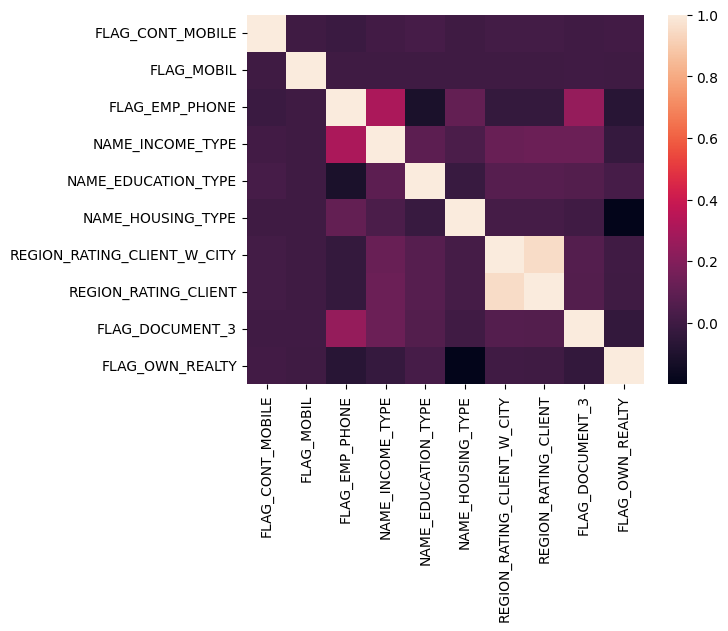

In [29]:
corr_10 = df[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY']].corr()
ax = sns.heatmap(corr_10, )
plt.show()

In [30]:
X = df_normalized[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY']]
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size= 0.2, random_state = 42)
Feature_selection = ml_model(X_train,X_test, Y_train, Y_test)
Feature_selection

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.00,0.0,0.00
1,KNeighborsClassifier,0.92,0.92,0.00,0.0,0.00
2,DecisionTreeClassifier,0.92,0.92,0.11,0.0,0.01
3,GaussianNB,0.10,0.10,0.08,1.0,0.15


In [34]:
# DAYS_BIRTH                     0.078239   
# REGION_RATING_CLIENT_W_CITY    0.060893'REGION_RATING_CLIENT_W_CITY'
# REGION_RATING_CLIENT           0.058899'REGION_RATING_CLIENT'
# DAYS_LAST_PHONE_CHANGE         0.055218
# NAME_EDUCATION_TYPE            0.054699'NAME_EDUCATION_TYPE'
# CODE_GENDER                    0.054692
# DAYS_ID_PUBLISH                0.051457
# REG_CITY_NOT_WORK_CITY         0.050994
# NAME_INCOME_TYPE               0.046829  'NAME_INCOME_TYPE'   
# FLAG_EMP_PHONE                 0.045982     'FLAG_EMP_PHONE'


# **Solution for imbalanced data**

In [35]:
correlations = df.corr()['TARGET'].abs().sort_values(ascending=False)
correlations

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_EDUCATION_TYPE            0.054699
CODE_GENDER                    0.054692
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
NAME_INCOME_TYPE               0.046829
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039623
REGION_POPULATION_RELATIVE     0.037227
NAME_HOUSING_TYPE              0.034489
LIVE_CITY_NOT_WORK_CITY        0.032518
NAME_CONTRACT_TYPE             0.030896
ORGANIZATION_TYPE              0.030765
AMT_CREDIT                     0.030369
FLAG_DOCUMENT_6                0.028602
FLAG_WORK_PHONE                0.028524
HOUR_APPR_PROCESS_START        0.024166


## Random over sampling

In [36]:
print('before Oversampling:',Counter(Y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train1, Y_train1 = oversample.fit_resample(X_train, Y_train)
print('After Oversampling:',Counter(Y_train1))

before Oversampling: Counter({0: 226132, 1: 19876})
After Oversampling: Counter({0: 226132, 1: 226132})


In [ ]:
# error

In [ ]:
oversampling = ml_model(X_train1,X_test, Y_train1, Y_test)
oversampling

In [ ]:
def ml_model_05(X_train,X_test, Y_train, Y_test):
    MLA = [LogisticRegression(),KNeighborsClassifier(n_neighbors=100),DecisionTreeClassifier(),GaussianNB()]
#     MLA = [KNeighborsClassifier(n_neighbors=100)]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        Y_pred_rf = alg.fit(X_train, Y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, Y_pred_rf),2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, Y_pred_rf),2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, Y_pred_rf),2)
        row_index+=1
    MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare  
# ml_model(X_train,X_test, Y_train, Y_test)

In [ ]:
oversampling = ml_model_05(X_train1,X_test, Y_train1, Y_test)
oversampling

## SMOTE

In [ ]:
print('before SMOTE:',Counter(Y_train))
sm = SMOTE(sampling_strategy='minority')
X_train2, Y_train2 = sm.fit_resample(X_train, Y_train)
print('After SMOTE:',Counter(Y_train2))

In [ ]:
Smote = ml_model(X_train2,X_test, Y_train2, Y_test)
Smote

In [ ]:
Smote = ml_model_05(X_train2,X_test, Y_train2, Y_test)
Smote

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ file hoặc tạo DataFrame
# Ví dụ: df = pd.read_csv('ten_file.csv')
# Thay 'ten_file.csv' bằng đường dẫn tới file của bạn hoặc thay thế df bằng DataFrame của bạn
columns = ['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY']
# Thay 'target' bằng tên cột thực tế trong DataFrame của bạn
for column_name in columns:
    
# column_name = 'FLAG_CONT_MOBILE'

    # Tạo DataFrame chứa số lần xuất hiện của mỗi giá trị trong cột
    value_counts_df = df[column_name].value_counts().reset_index()
    value_counts_df.columns = [column_name, 'count']

    # Thiết lập màu sắc cho từng giá trị trong cột 'TARGET'
    color_mapping = {1: 'red', 0: 'blue'}  # Default color for NaN values is 'gray'

    # Vẽ biểu đồ cột với màu sắc tùy thuộc vào nhãn trong cột 'TARGET'
    plt.figure(figsize=(10, 6))
    plt.bar(value_counts_df[column_name], value_counts_df['count'], color=df['TARGET'].map(color_mapping))

    # Đặt tên cho trục và tiêu đề
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Count of each unique value in the {column_name} column colored by TARGET')

    # Hiển thị biểu đồ
    plt.show()



In [ ]:
df.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file hoặc tạo DataFrame
# Ví dụ: df = pd.read_csv('ten_file.csv')
# Thay 'ten_file.csv' bằng đường dẫn tới file của bạn hoặc thay thế df bằng DataFrame của bạn

columns = ['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY']
# Thay 'target' bằng tên cột thực tế trong DataFrame của bạn
for column_name in columns:
    # Tính số lần xuất hiện của mỗi giá trị trong cột
    value_counts = df[column_name].value_counts()
    value_counts = value_counts.sort_index()
    # Tạo scatter plot
    color_mapping = {1: 'red', 0: 'blue'}
    plt.figure(figsize=(10, 6))
    scatter_plot = plt.scatter(value_counts.index, value_counts.values, c=df.groupby(column_name)['TARGET'].first().map(color_mapping))

    # Đặt tên cho trục và tiêu đề
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Scatter Plot of Unique Values and Counts in {column_name}')

    # Hiển thị biểu đồ
    plt.show()


In [ ]:
plt.scatter(df['TARGET'], df['FLAG_CONT_MOBILE'])
plt.show()

In [ ]:
value_counts = df.groupby([column_name, 'TARGET']).size().unstack(fill_value=0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file hoặc tạo DataFrame
# Ví dụ: df = pd.read_csv('ten_file.csv')
# Thay 'ten_file.csv' bằng đường dẫn tới file của bạn hoặc thay thế df bằng DataFrame của bạn

columns = ['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY']
# Thay 'target' bằng tên cột thực tế trong DataFrame của bạn
for column_name in columns:
    # Thay 'label1' và 'label2' bằng nhãn thực tế trong cột 'TARGET'
    label1 = 0
    label2 = 1

    # Tính số lần xuất hiện của mỗi giá trị trong cột theo từng nhãn
    value_counts = df.groupby([column_name, 'TARGET']).size().unstack(fill_value=0)

    # Tính tổng số lần xuất hiện của mỗi giá trị trong cột
    total_counts = value_counts.sum(axis=1)

    # Tạo DataFrame cho scatter plot
    scatter_data = pd.DataFrame({
        'Value': total_counts.index,
        'Count': total_counts.values,
        'TARGET': total_counts.index.map(lambda val: df[df[column_name] == val]['TARGET'].iloc[0])
    })

    # Tạo scatter plot
    plt.figure(figsize=(12, 6))
    scatter_plot = sns.scatterplot(data=scatter_data, x='Value', y='Count', hue='TARGET', palette='Set2', s=100)

    # Đặt tên cho trục và tiêu đề
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Scatter Plot of {column_name} Counts by TARGET')

    # Hiển thị biểu đồ
    plt.show()
